Train data shape: (42000, 785)
Test data shape: (42000, 785)
Determined image size: 28x28


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.1076 - loss: 2.3293 - val_accuracy: 0.1115 - val_loss: 2.3104
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - accuracy: 0.1047 - loss: 2.3093 - val_accuracy: 0.1115 - val_loss: 2.3054
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.1099 - loss: 2.3071 - val_accuracy: 0.1036 - val_loss: 2.3033
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.1043 - loss: 2.3074 - val_accuracy: 0.1036 - val_loss: 2.3075
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.1036 - loss: 2.3083 - val_accuracy: 0.1115 - val_loss: 2.3039
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.1041 - loss: 2.3085 - val_accuracy: 0.1048 - val_loss: 2.3139
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.0996 - loss: 2.3090 - val_accuracy: 0.0995 - val_loss: 2.3078
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.1033 -

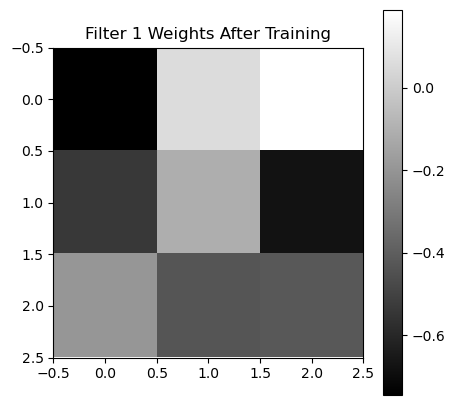

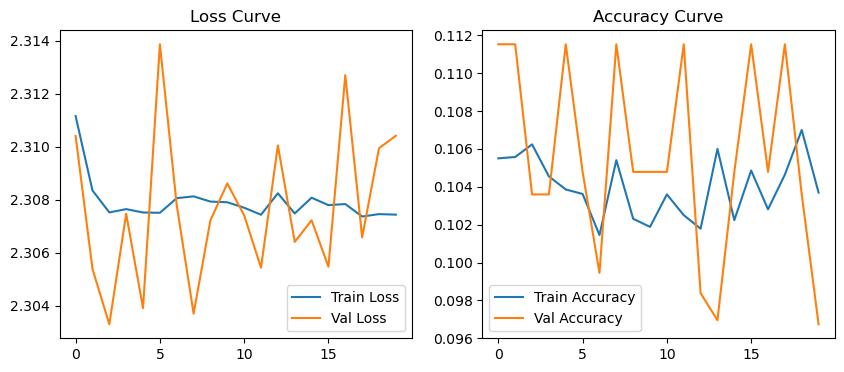

Final Training Accuracy: 0.1037
Weight evolution and learning curves plotted.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models

train_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"
test_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

num_pixels_train = train_df.shape[1] - 1 
num_pixels_test = test_df.shape[1] - 1 

if num_pixels_train != num_pixels_test:
    raise ValueError("Mismatch in image sizes between train and test datasets.")

img_size = int(np.sqrt(num_pixels_train))  
print(f"Determined image size: {img_size}x{img_size}")

X_train = train_df.iloc[:, 1:].values.reshape(-1, img_size, img_size, 1) / 255.0  
y_train = tf.keras.utils.to_categorical(train_df.iloc[:, 0], num_classes=10)

X_test = test_df.iloc[:, 1:].values.reshape(-1, img_size, img_size, 1) / 255.0
y_test = tf.keras.utils.to_categorical(test_df.iloc[:, 0], num_classes=10)

model = models.Sequential([
    layers.Conv2D(3, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(784, activation='relu'),  
    layers.Dense(10, activation='softmax') 
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))

filters, biases = model.layers[0].get_weights()

plt.figure(figsize=(5, 5))
plt.imshow(filters[:, :, 0, 0], cmap='gray')
plt.title("Filter 1 Weights After Training")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Curve")
plt.legend()
plt.show()

final_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_accuracy:.4f}")
print("Weight evolution and learning curves plotted.")
